# KD Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Retina
%config InlineBackend.figure_format = 'retina'

## Small dataset

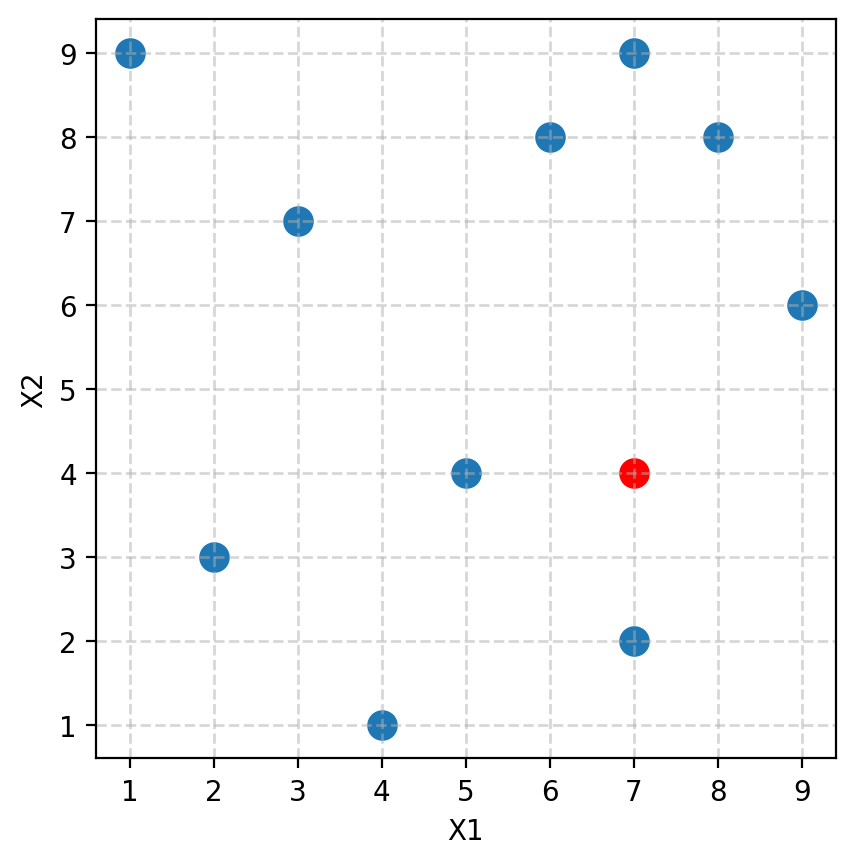

In [2]:
X = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])

query_pt = np.array([7, 4])

def plot_dataset():
    plt.scatter(X[:, 0], X[:, 1], s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
    plt.xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
    plt.yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))

    plt.scatter(query_pt[0], query_pt[1], color='red', s=100)

plot_dataset()

In [3]:
import numpy as np

class Node:
    def __init__(self, median_point=None, left=None, right=None, parent=None, split_dimension=None, points=None):
        self.median_point = median_point
        self.left = left
        self.right = right
        self.parent = parent
        self.split_dimension = split_dimension
        self.points = points

def build_kd_tree(points, parent=None, depth=0):
    if len(points)==0:
        return None
    if len(points)==1:
        return Node(median_point=None, left=None, right=None, parent=parent, split_dimension=None, points=points)

    n_dimensions = len(points[0])
    dimension = np.random.randint(n_dimensions)  # randomly choose a dimension [0,dimension-1]

    points = sorted(points, key=lambda x: x[dimension])  # sort points based on chosen dimension

    median_index = len(points) // 2
    # median_point = points[median_index]
    min=points[0][dimension]
    max=points[-1][dimension]
    for i,p in enumerate(points):
      if(p[dimension]>(min+max)//2):
        median_index = i
        break

    median_point = points[median_index]

    n = Node()

    # Recursively build subtrees
    left_subtree = build_kd_tree(points[:median_index], n, depth + 1)
    right_subtree = build_kd_tree(points[median_index:], n, depth + 1)

    n.left = left_subtree
    n.right = right_subtree
    n.parent = parent
    n.median_point = median_point
    n.split_dimension = dimension
    n.points = points

    return n



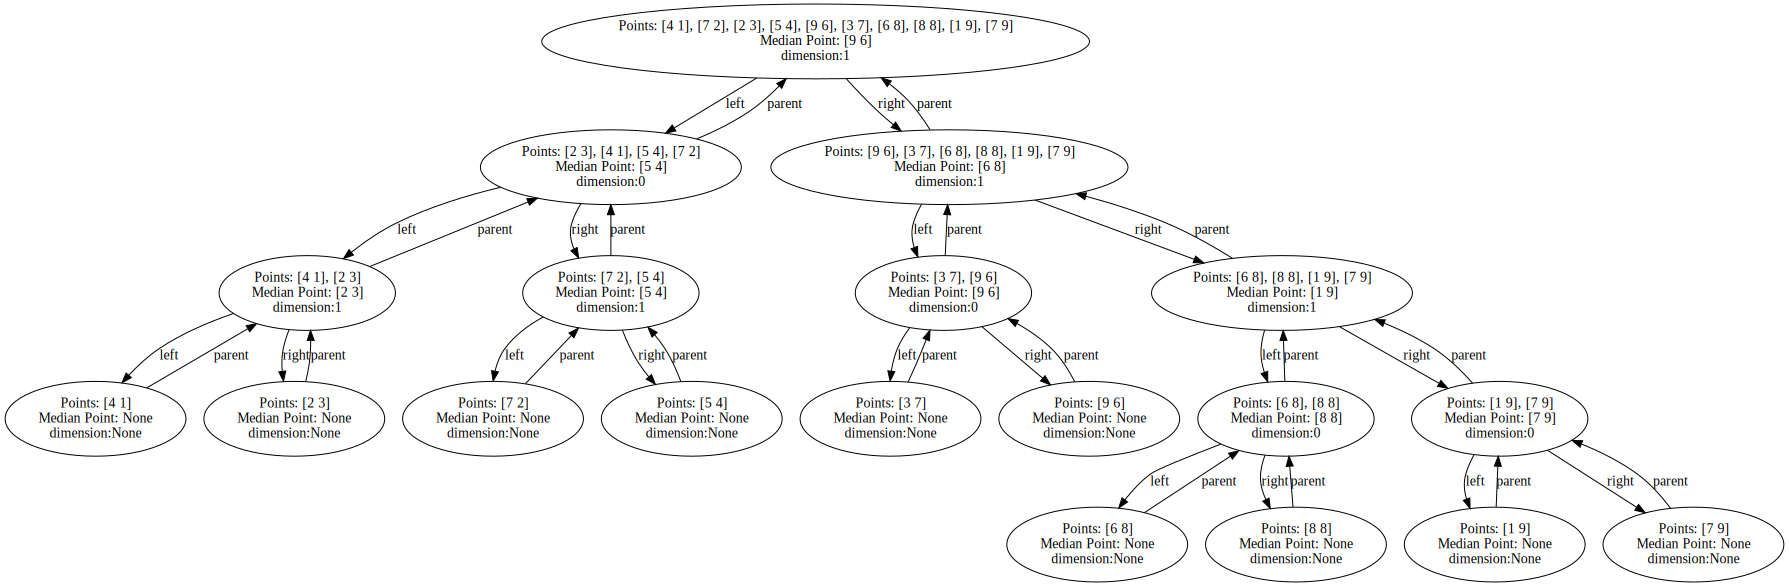

In [ ]:
import graphviz

def visualize_kd_tree(root):
    dot = graphviz.Digraph()

    def visualize_node(node):
        if node:
            points_str = ', '.join(map(str, node.points))  # Convert points to string
            label = f"Points: {points_str}\nMedian Point: {node.median_point}\ndimension:{node.split_dimension}"
            dot.node(str(node), label=label)
            if node.left:
                dot.edge(str(node), str(node.left), label="left")
                visualize_node(node.left)
            if node.right:
                dot.edge(str(node), str(node.right), label="right")
                visualize_node(node.right)
            if node.parent:
                dot.edge(str(node), str(node.parent), label="parent")


    visualize_node(root)
    return dot



kd_tree = build_kd_tree(X, None, 0) # X = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])
graph = visualize_kd_tree(kd_tree)
graph.render("kd_tree", format="png", cleanup=True)  # Render and save the graph as a PNG file
display(graph)

In [4]:
def find_nearest_neighbors(query_point, kd_tree, k, leaf_size=40):
  current_node = kd_tree
  while current_node != None:
    median_point = current_node.median_point
    dimension = current_node.split_dimension

    if(k>leaf_size):
      leaf_size=k

    if(query_point[dimension] < median_point[dimension]):
      # check if len(points) is k
      if(len(current_node.left.points)>=leaf_size):
        current_node = current_node.left
      else:
        break
      continue
    else:
      if(len(current_node.right.points)>=leaf_size):
        current_node = current_node.right
      else:
        break

  points = current_node.points
  l = []
  for point in points:
    l.append([np.linalg.norm(np.array(query_point) - np.array(point)),point])

  sorted(l, key=lambda x: x[0])
  return l[:k]

In [ ]:
find_nearest_neighbors([3,2], kd_tree, 2, 5)

[[1.4142135623730951, array([4, 1])], [4.0, array([7, 2])]]

### Verifying the result using sklearn




In [ ]:
import numpy as np
from sklearn.neighbors import KDTree
rng = np.random.RandomState(0)
tree = KDTree(X, leaf_size=5)
query_point = np.array([[3, 2]])

dist, ind = tree.query(query_point, k=2)
print(dist, X[ind])

[[1.41421356 1.41421356]] [[[4 1]
  [2 3]]]


## Larger dataset

In [ ]:
X_big = np.random.randint(low=0, high=10, size=(100,5)).tolist()
X_big = np.array(X_big) # This makes it a numpy array overall, but the contents are python lists

In [ ]:
X_big

array([[7, 8, 4, 5, 7],
       [4, 5, 0, 2, 1],
       [1, 2, 0, 9, 0],
       [8, 2, 0, 2, 0],
       [8, 0, 4, 3, 9],
       [5, 0, 6, 4, 9],
       [2, 8, 0, 3, 5],
       [1, 2, 1, 5, 9],
       [9, 8, 9, 5, 6],
       [9, 1, 1, 5, 4],
       [7, 0, 5, 5, 0],
       [0, 9, 5, 8, 2],
       [3, 1, 1, 8, 4],
       [3, 3, 0, 8, 9],
       [9, 6, 8, 0, 9],
       [4, 7, 1, 2, 7],
       [9, 7, 0, 7, 4],
       [4, 9, 7, 7, 1],
       [6, 1, 5, 9, 9],
       [8, 5, 4, 4, 0],
       [4, 1, 2, 3, 2],
       [6, 0, 8, 0, 6],
       [9, 3, 3, 2, 6],
       [3, 1, 6, 1, 8],
       [9, 0, 2, 2, 0],
       [6, 8, 7, 9, 2],
       [7, 2, 9, 4, 1],
       [3, 5, 4, 0, 9],
       [0, 2, 9, 6, 6],
       [8, 1, 7, 6, 4],
       [2, 6, 6, 3, 9],
       [2, 9, 4, 7, 6],
       [4, 3, 0, 6, 8],
       [3, 5, 0, 8, 1],
       [2, 7, 4, 3, 7],
       [0, 0, 3, 9, 8],
       [5, 0, 4, 6, 6],
       [7, 5, 0, 9, 4],
       [1, 1, 2, 2, 7],
       [0, 3, 8, 2, 2],
       [3, 5, 6, 1, 8],
       [4, 9, 5,

In [ ]:
kd_tree_big = build_kd_tree(X_big, None, 0)
find_nearest_neighbors([3,3,3,3,3], kd_tree_big, 5, 20)

[[5.385164807134504, array([7, 0, 3, 1, 3])],
 [3.872983346207417, array([2, 0, 4, 1, 3])],
 [7.483314773547883, array([9, 0, 2, 2, 0])],
 [8.426149773176359, array([8, 0, 4, 3, 9])],
 [5.0990195135927845, array([1, 1, 2, 2, 7])]]

### Verifying the result using sklearn




In [ ]:
import numpy as np
from sklearn.neighbors import KDTree
rng = np.random.RandomState(0)
tree = KDTree(X_big, leaf_size=20)
query_point = np.array([[3,3,3,3,3]])

dist, ind = tree.query(query_point, k=5)

for i,j in enumerate(ind):
  print(dist[i], X_big[j])

[2.64575131 3.87298335 3.87298335 3.87298335 4.        ] [[4 1 2 3 2]
 [2 3 0 1 4]
 [2 0 4 1 3]
 [3 2 0 1 4]
 [4 6 5 4 4]]


### Training and Testing time

In [ ]:
import time
train_time = []
test_time = []

for n in [2,5,10,50,100,500,1000]:

  X_big = np.random.randint(low=0, high=10, size=(n,5)).tolist()
  X_big = np.array(X_big) # This makes it a numpy array overall, but the contents are python lists

  t1 = time.time()
  kd_tree_big = build_kd_tree(X_big, None, 0)
  t2 = time.time()
  train_time.append(t2-t1)

  t3 = time.time()
  result2 = find_nearest_neighbors([3,3,3,3,3], kd_tree_big, 5, 20)
  t4 = time.time()
  test_time.append(t4-t3)

print(train_time, test_time)


[0.0001323223114013672, 0.00010085105895996094, 0.00017404556274414062, 0.0009093284606933594, 0.0062601566314697266, 0.011120319366455078, 0.16079258918762207] [9.5367431640625e-05, 9.226799011230469e-05, 0.00013113021850585938, 0.006620883941650391, 0.0003921985626220703, 0.0007159709930419922, 0.0003705024719238281]


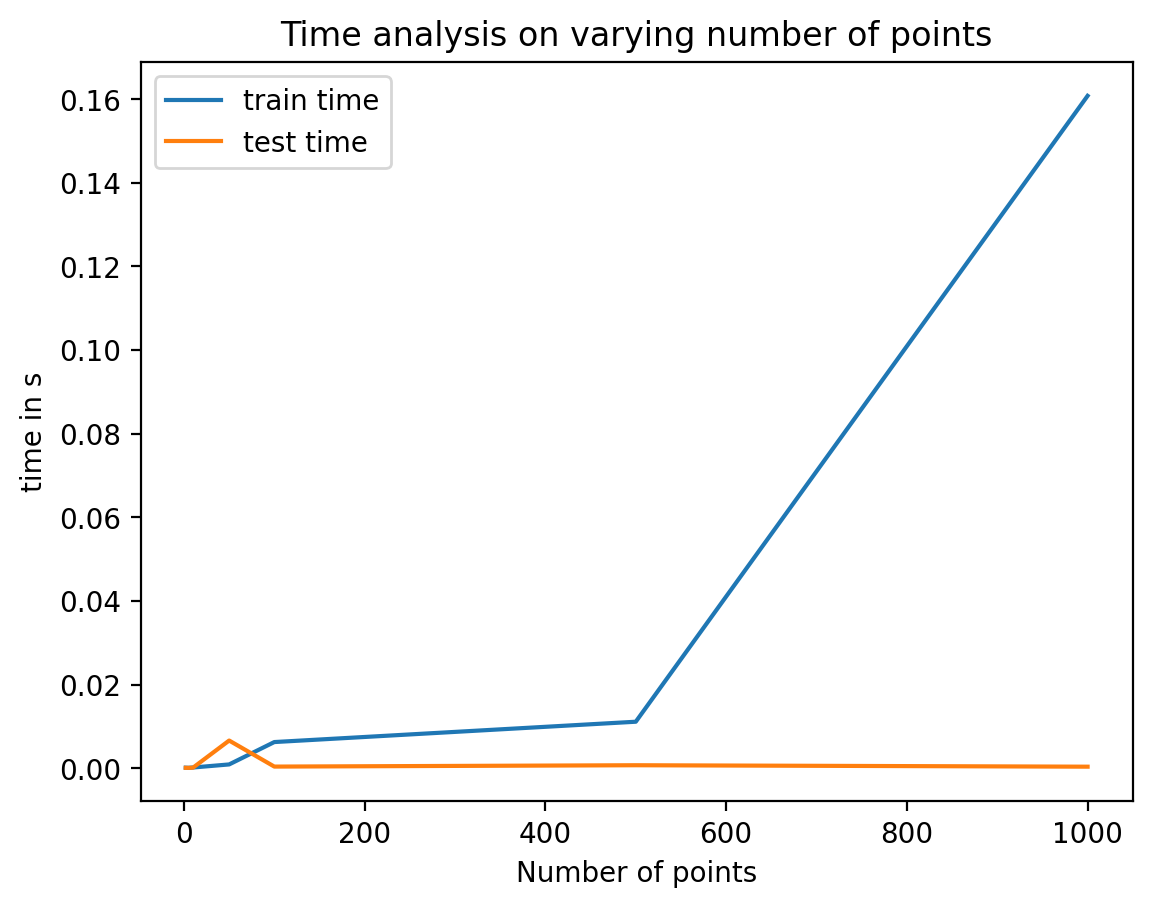

In [ ]:
import matplotlib.pyplot as plt

x = [2,5,10,50,100,500,1000]
plt.plot(x,train_time,label="train time")
plt.plot(x,test_time,label="test time")
plt.title("Time analysis on varying number of points")
plt.xlabel("Number of points")
plt.ylabel("time in s")
plt.legend()

When the number of points is reasonably large, the training time is more than the testing time. This is because the number of splits and hence the depth of the tree increases with an increase in the number of data points.

In [ ]:
import time
train_time = []
test_time = []

for d in [2,5,10,20,50]:

  X_big = np.random.randint(low=0, high=10, size=(1000,d)).tolist()
  X_big = np.array(X_big) # This makes it a numpy array overall, but the contents are python lists

  t1 = time.time()
  kd_tree_big = build_kd_tree(X_big, None, 0)
  t2 = time.time()
  train_time.append(t2-t1)

  t3 = time.time()
  result2 = find_nearest_neighbors(np.random.randint(low=0, high=10,size=(1,d)).tolist()[0], kd_tree_big, 5, 20)
  t4 = time.time()
  test_time.append(t4-t3)

print(train_time, test_time)


[0.01690506935119629, 0.012377262115478516, 0.016671180725097656, 0.01473546028137207, 0.013217687606811523] [0.0003147125244140625, 0.0002560615539550781, 0.0007357597351074219, 0.0003006458282470703, 0.0005006790161132812]


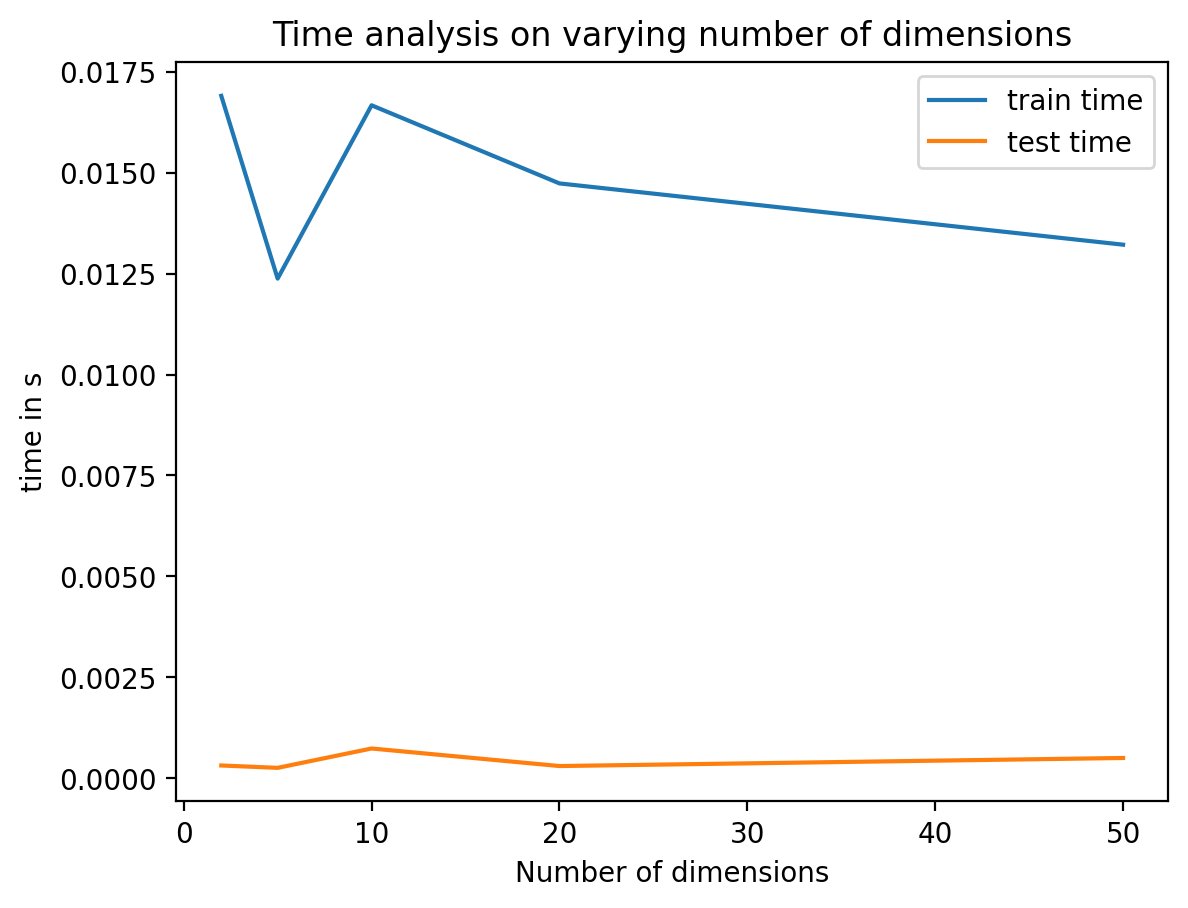

In [ ]:
import matplotlib.pyplot as plt

x = [2,5,10,20,50]
plt.plot(x,train_time,label="train time")
plt.plot(x,test_time,label="test time")
plt.title("Time analysis on varying number of dimensions")
plt.xlabel("Number of dimensions")
plt.ylabel("time in s")
plt.legend()

The training time is more than the testing time. This is correct as the creation of tree while training takes time.

The training time randomly increases and decreases as the splits are chosen randomly, so they affect the depth of the tree formed.

### Calculating memory

In [ ]:
import sys
import ctypes

def node_memory_usage(node):
    if node is None:
        return 0

    node_memory = sys.getsizeof(node)
    median_point_memory = 0

    if node.median_point is not None:
      median_point_memory = len(node.median_point) * np.array(node.median_point).itemsize
    points_memory = 0

    if node.points is not None:
      points_memory = len(node.points) * len(node.points[0]) * np.array(node.points[0]).itemsize
    pointer_memory = 2 * ctypes.sizeof(ctypes.c_void_p)  # Size of a pointer

    return node_memory + median_point_memory + points_memory + pointer_memory


def total_memory_usage(root):
    if root is None:
        return 0

    memory_usage = node_memory_usage(root)

    memory_usage += total_memory_usage(root.left)
    memory_usage += total_memory_usage(root.right)
    return memory_usage

In [ ]:
import graphviz

def visualize_kd_tree(root):
    dot = graphviz.Digraph()

    def visualize_node(node):
        if node:
            points_str = ', '.join(map(str, node.points))  # Convert points to string
            label = f"Points: {points_str}\nMedian Point: {node.median_point}\ndimension:{node.split_dimension}"
            dot.node(str(node), label=label)
            if node.left:
                dot.edge(str(node), str(node.left), label="left")
                visualize_node(node.left)
            if node.right:
                dot.edge(str(node), str(node.right), label="right")
                visualize_node(node.right)
            if node.parent:
                dot.edge(str(node), str(node.parent), label="parent")


    visualize_node(root)
    return dot

#### Examples:

Single node object:

Total memory usage of KD-tree: 80 bytes


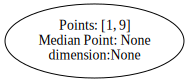

In [ ]:
X = [[1,9]]
kd_tree = build_kd_tree(X, None, 0)
total_memory = total_memory_usage(kd_tree)
print("Total memory usage of KD-tree:", total_memory, "bytes")
graph = visualize_kd_tree(kd_tree)
graph.render("kd_tree", format="png", cleanup=True)  # Render and save the graph as a PNG file
display(graph)

3 node objects:

Total memory usage of KD-tree: 272 bytes


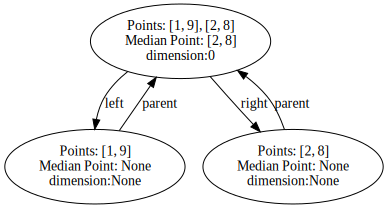

In [ ]:
X = [[1,9], [2,8]]
kd_tree = build_kd_tree(X, None, 0)
total_memory = total_memory_usage(kd_tree)
print("Total memory usage of KD-tree:", total_memory, "bytes")
graph = visualize_kd_tree(kd_tree)
graph = visualize_kd_tree(kd_tree)
graph.render("kd_tree", format="png", cleanup=True)  # Render and save the graph as a PNG file
display(graph)

In [ ]:
mem = []
for n in [2,5,10,50,100,500,1000]:

  X_big = np.random.randint(low=0, high=10, size=(n,5)).tolist()
  X_big = np.array(X_big) # This makes it a numpy array overall, but the contents are python lists

  mem.append(total_memory_usage(build_kd_tree(X_big, None, 0)))
mem

[392, 1416, 3496, 21976, 48496, 289976, 621576]

Text(0, 0.5, 'Memory in bytes')

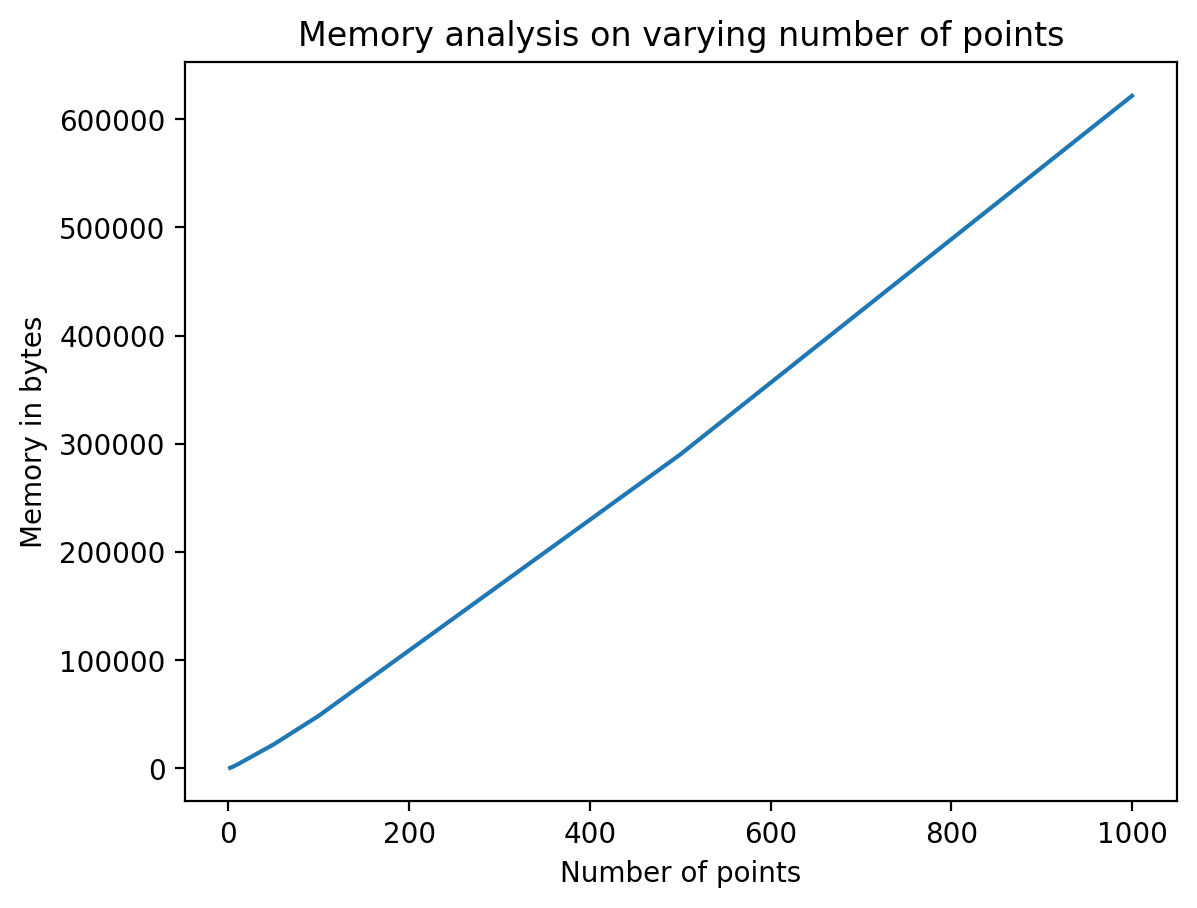

In [ ]:
import matplotlib.pyplot as plt

x = [2,5,10,50,100,500,1000]
plt.plot(x,mem)
plt.title("Memory analysis on varying number of points")
plt.xlabel("Number of points")
plt.ylabel("Memory in bytes")

In [ ]:
mem = []
for d in [2,5,10,20,50]:

  X_big = np.random.randint(low=0, high=10, size=(1000,d)).tolist()
  X_big = np.array(X_big) # This makes it a numpy array overall, but the contents are python lists

  mem.append(total_memory_usage(build_kd_tree(X_big, None, 0)))
mem

[324272, 623136, 1114096, 2103136, 5027136]

Text(0, 0.5, 'Memory in bytes')

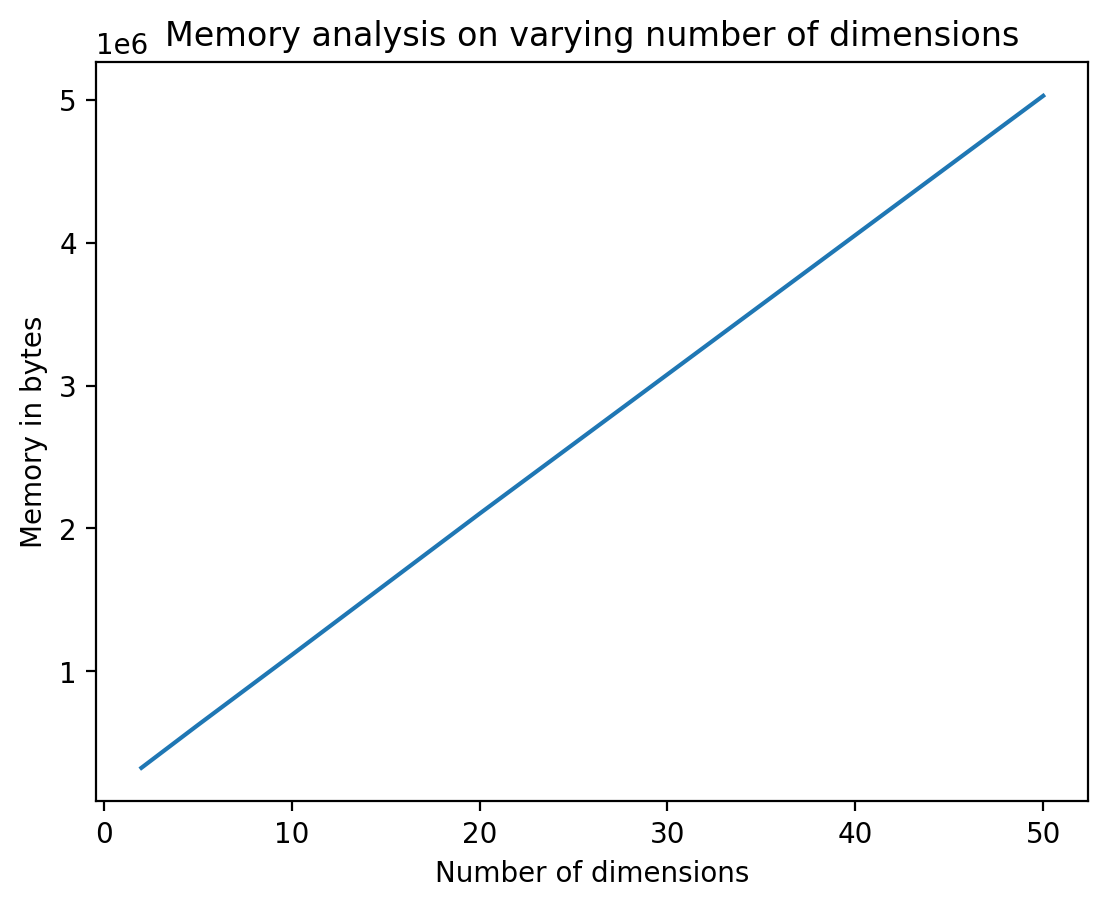

In [ ]:
import matplotlib.pyplot as plt

x = [2,5,10,20,50]
plt.plot(x,mem)
plt.title("Memory analysis on varying number of dimensions")
plt.xlabel("Number of dimensions")
plt.ylabel("Memory in bytes")

## Showing the partitions in a 2D space

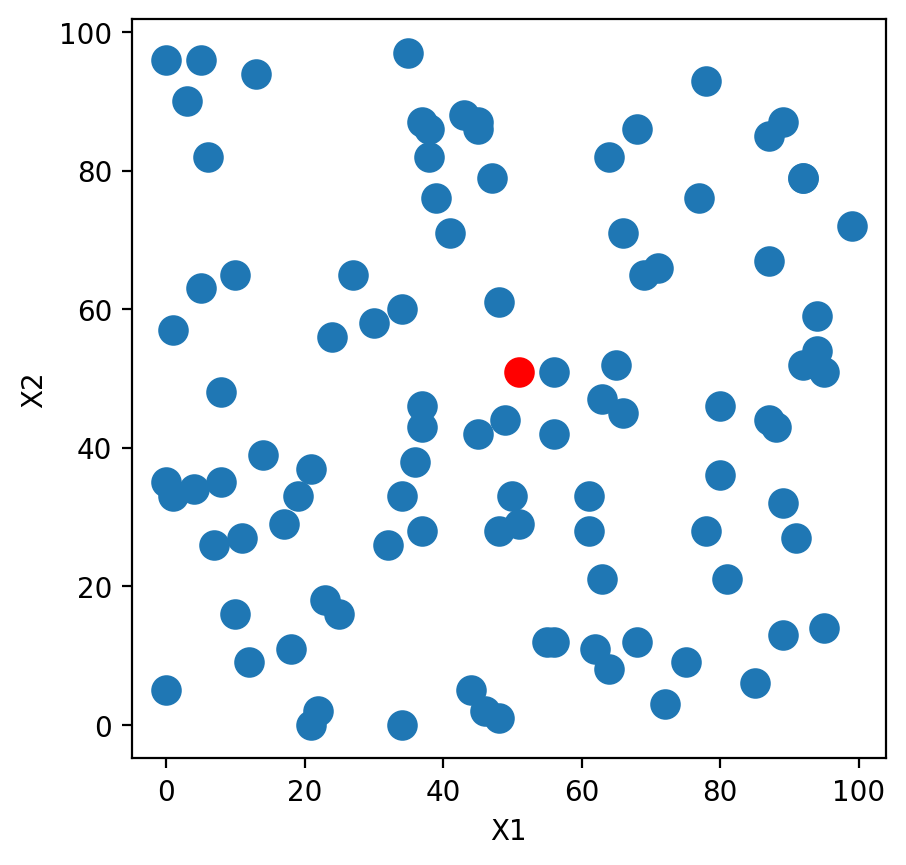

In [ ]:
X = np.random.randint(low=0, high=100, size=(100,2)).tolist()
X = np.array(X)

query_pt = np.array([51,51])

def plot_dataset():
    plt.scatter(X[:, 0], X[:, 1], s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')

    plt.scatter(query_pt[0], query_pt[1], color='red', s=100)

plot_dataset()

In [ ]:
kd_tree = build_kd_tree(X, None, 0)

In [ ]:
dd = {0:[], 1:[]}

def find_nearest_neighbors(query_point, kd_tree, k, leaf_size=40):
  global dd
  current_node = kd_tree
  while current_node != None:
    median_point = current_node.median_point
    dimension = current_node.split_dimension

    if(k>leaf_size):
      leaf_size=k

    if(query_point[dimension] < median_point[dimension]):

      if(len(current_node.left.points)>=leaf_size):
        current_node = current_node.left

        dd[dimension].append(median_point)
      else:
        break
      continue
    else:
      if(len(current_node.right.points)>=leaf_size):
        current_node = current_node.right

        dd[dimension].append(median_point)
      else:
        break

  points = current_node.points

  l = []
  for point in points:
    l.append([np.linalg.norm(np.array(query_point) - np.array(point)),point])

  sorted(l, key=lambda x: x[0])
  return l[:k]

In [ ]:
query_pt = np.array([51,51])
ans = find_nearest_neighbors([51,51], kd_tree, 5, 5)

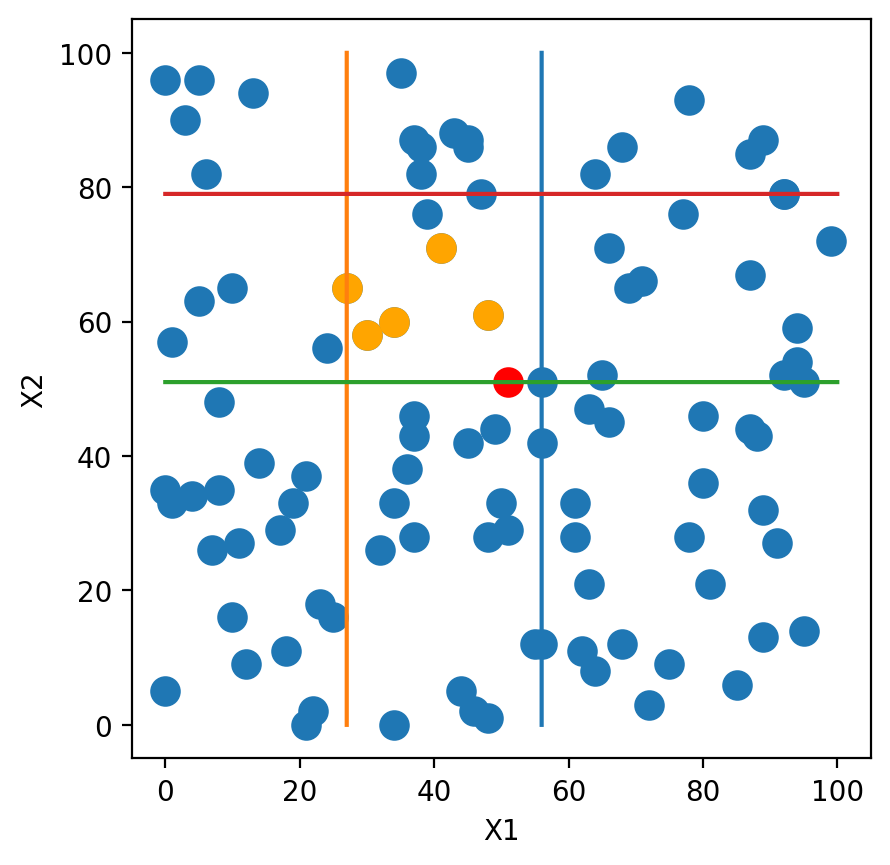

In [ ]:
def plot_dataset():
    plt.scatter(X[:, 0], X[:, 1], s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')

    plt.scatter(query_pt[0], query_pt[1], color='red', s=100)

    for i in ans:
     plt.scatter(i[1][0], i[1][1], color='orange', s=100)

    for i in dd[0]:
      plt.plot([i[0]]*100*100,np.arange(0,100,0.01))

    for i in dd[1]:
      plt.plot(np.arange(0,100,0.01),[i[1]]*100*100)


plot_dataset()

Clearly, we can see that the nearest neighbors given by KD trees are not actually the closest points. This is because of the random splitting taking place. However, it does give a good approximation.

Let us now see the actual neighbors using the brute force algorithm.

[[56 51]
 [49 44]
 [56 42]
 [48 61]
 [45 42]]


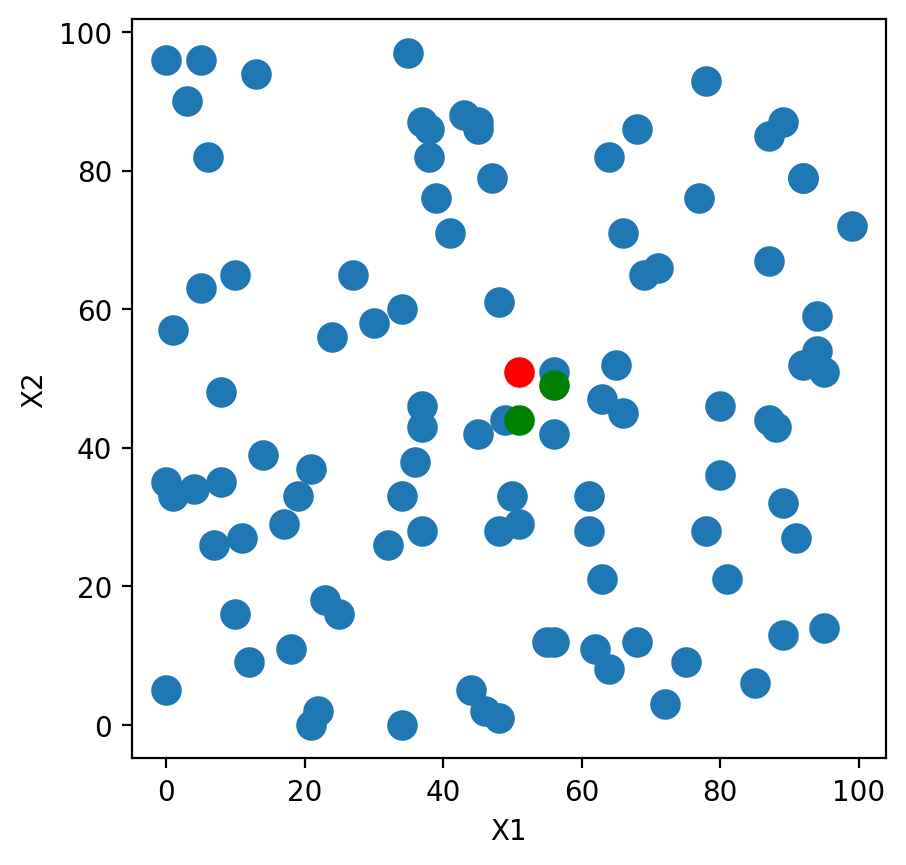

In [ ]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5, algorithm='brute').fit(X)
distances_sklearn, idxs_sklearn = nbrs.kneighbors([query_pt])

def plot_dataset2():
    plt.scatter(X[:, 0], X[:, 1], s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')

    plt.scatter(query_pt[0], query_pt[1], color='red', s=100)

    for p in X[idxs_sklearn[:5]]:
      print(p)
      plt.scatter(p[0], p[1], color='green', s=100)


plot_dataset2()